Importing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data

In [3]:
data = pd.read_csv('/Users/deepali/Desktop/datasets/Telco-Customer-Churn.csv')

In [4]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Let's have an overview of the data

Predicted  behavior of 7000+ customers by building models such as Regression, Decision Tree Visualization,KNN Classifier,Support Vector Machine




Recommended focused customer retention programs


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

We convert TotalCharges from String to float variable

In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

Lets check whether there are null values in data

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We handle the null values in the dataset

In [9]:
data.fillna(method='ffill',inplace=True)

We now try to find the correlation of the quantitative variables

In [10]:
data_for_correlation = data[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
data_for_correlation.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [11]:
data_for_correlation.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.822745
MonthlyCharges,0.247900,1.000000,0.649178
TotalCharges,0.822745,0.649178,1.000000


### Total Charges has positive correlation with tenure and monthly charges

Churn column tells us the customers who left within the last month 

In [12]:
churn_yes = (data['Churn'] =='Yes').sum()
churn_no = (data['Churn'] == 'No').sum()

In [13]:
total = len(data['Churn'])

In [14]:
churn_percent_yes = (churn_yes/total)*100
churn_percent_no = (churn_no/total)*100

We thus come to the conclusion that : <br>
1869 customers left within the last month out of the total 7043 customers(5174+1869) <br>
Thus the churn percent for yes is : 1869/7043 = 0.265 <br>
<b>Thus the churn percent for yes is 26.53%</b>

5174 customers did not leave within the last month out og the total 7043 customers (5174+1869)
Thus the churn percent for yes is : 5174/7043 = 0.265 <br>
<b>Thus the churn percent for yes is 73.46%</b>

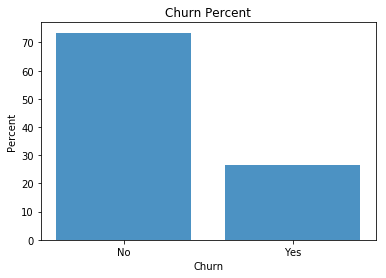

In [15]:
x_names = 'Yes','No'
y_names = churn_percent_yes,churn_percent_no
plt.bar(x_names,y_names,align='center', alpha=0.8)
plt.xlabel('Churn')
plt.ylabel('Percent')
plt.title('Churn Percent')
plt.show()

### <b>Around 26.53% customers left within the last month</b>

We now try to find that whether the churn rate is gender specific 

Males with a yes and no churn 

In [16]:
male_yes_churn = ((data['gender'] == 'Male')&(data['Churn'] == 'Yes')).sum()
male_no_churn = ((data['gender'] == 'Male') & (data['Churn']=='No')).sum()

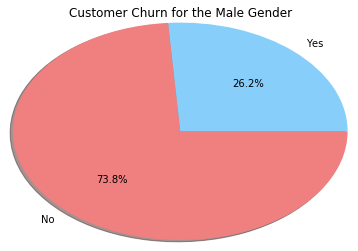

In [17]:
labels = 'Yes','No'
sizes = [male_yes_churn , male_no_churn]
colors = ['lightskyblue','lightcoral']
plt.pie(sizes, labels = labels,colors= colors, shadow = True, autopct='%1.1f%%',radius = 1.25)
plt.title('Customer Churn for the Male Gender')
plt.show()

Female with a yes & no churn

In [18]:
female_yes_churn = ((data['gender'] == 'Female') & (data['Churn']=='Yes')).sum()
female_no_churn = ((data['gender'] == 'Female') & (data['Churn'] == 'No')).sum()

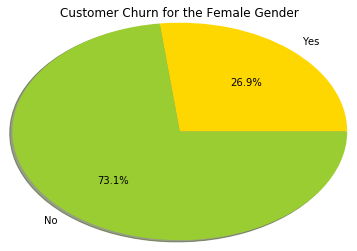

In [19]:
labels = 'Yes', 'No'
sizes = female_yes_churn,female_no_churn
colors = ['gold','yellowgreen']
plt.pie(sizes,labels = labels,colors = colors,radius = 1.25,shadow = True, autopct='%1.1f%%')
plt.title('Customer Churn for the Female Gender')
plt.show()

### The churn percent is almost equal in both Male and Female

Internet Distribution in Customer Distribution

In [20]:
internet_service_dsl_yes = ((data['InternetService'] == 'DSL') & (data['Churn'] == 'Yes')).sum()
internet_service_optic_yes =((data['InternetService'] == 'Fiber optic') & (data['Churn'] == 'Yes')).sum()
no_internet_churn_yes = ((data['InternetService'] == 'No') & (data['Churn'] == 'Yes')).sum()

In [21]:
internet_service_dsl_no = ((data['InternetService'] == 'DSL') & (data['Churn'] == 'No')).sum()
internet_service_optic_no =((data['InternetService'] == 'Fiber optic') & (data['Churn'] == 'No')).sum()
no_internet_churn_no = ((data['InternetService'] == 'No') & (data['Churn'] == 'No')).sum()

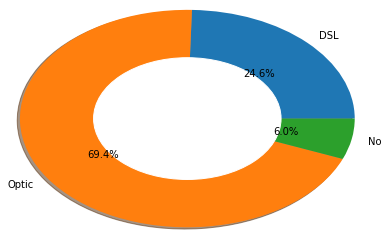

In [22]:
size = [internet_service_dsl_yes,internet_service_optic_yes,no_internet_churn_yes]
labels = ['DSL','Optic','No']
plt.pie(size,labels = labels,radius = 1.25,shadow = True, autopct='%1.1f%%')

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

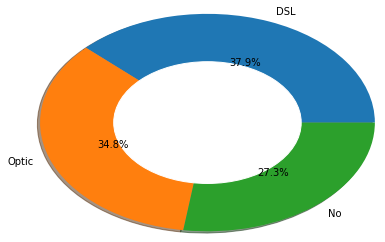

In [23]:
size = [internet_service_dsl_no,internet_service_optic_no,no_internet_churn_no]
labels = ['DSL','Optic','No']

plt.pie(size,labels= labels,radius = 1.25,shadow = True, autopct='%1.1f%%')
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### <b>The Churn Rate is highest in case of Fiber Optic Internet Services.</b>

#### We now convert the categorical variables to numerical variables

Remove customerID and Churn from the data

In [24]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [25]:
df2 = data.iloc[:,1:]

In [26]:
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [27]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


df2 is the dataset that has the customerID and Churn removed

Converting the categorical variables into numeric variable (dummy variable)

In [28]:
dummy = pd.get_dummies(df2)

In [29]:
dummy.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


### dummy is the data frame which contains dummy variables

In [30]:
#We will use the data frame where we had created dummy variables
y = dummy['Churn'].values
X = dummy.drop(columns = ['Churn'])

In [31]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Multiple Regression

In [32]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(regressor.intercept_)  

0.22231316674708


In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
SeniorCitizen,0.047543
tenure,-0.002099
MonthlyCharges,0.002426
TotalCharges,-0.000045
gender_Female,0.004583
gender_Male,-0.004583
Partner_No,-0.002514
Partner_Yes,0.002514
Dependents_No,0.013770
Dependents_Yes,-0.013770


In [35]:
y_pred = regressor.predict(X_test) 

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  


In [37]:
import numpy as np
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.3013412052169908
Mean Squared Error: 0.14663208571661765
Root Mean Squared Error: 0.38292569216052563


### Logistic Regression

In [38]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [39]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7963094393186657


In [40]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.588298
InternetService_Fiber optic                0.308869
SeniorCitizen                              0.267836
PaymentMethod_Electronic check             0.254742
OnlineSecurity_No                          0.178699
TechSupport_No                             0.170368
OnlineBackup_No                            0.128850
StreamingTV_Yes                            0.106903
PaperlessBilling_Yes                       0.096389
PhoneService_No                            0.083883
MultipleLines_No phone service             0.083883
Dependents_No                              0.038063
StreamingMovies_Yes                        0.031324
MultipleLines_Yes                          0.024487
MonthlyCharges                             0.003008
TotalCharges                               0.000269
DeviceProtection_No                       -0.003381
Partner_Yes                               -0.036166
DeviceProtection_Yes                      -0.037483
gender_Femal

In [41]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [42]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score_KNN = accuracy_score(y_test, y_pred)
accuracy_score_KNN

0.7452093683463449

In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
cnf_matrix = (confusion_matrix(y_test, y_pred))  
classification_report = (classification_report(y_test, y_pred)) 

In [46]:
cnf_matrix

array([[872, 169],
       [190, 178]])

In [47]:
classification_report

'             precision    recall  f1-score   support\n\n          0       0.82      0.84      0.83      1041\n          1       0.51      0.48      0.50       368\n\navg / total       0.74      0.75      0.74      1409\n'

In [48]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [49]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

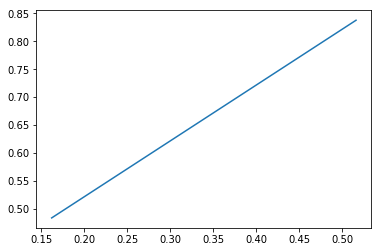

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x =  FPR # false_positive_rate
y =  TPR # true_positive_rate 

# This is the ROC curve
plt.plot(x,y)
plt.show() 

Lets analyse the <b>confusion matrix</b> <br>
True Positive is 872 i.e 872 is the number of classes are correctly predicted as True <br>
True Negative is 178 i.e 178 is the number of classes are correctly preicted as False<br>
False Positive is 169 i.e 169 classes are falsely predicted as positive<br>
False Negative is 190 i.e 190 classes are falsely predicted as negative

True positive = sensitivity=recall

True Negativity = specificity

Precision is when it predicts yes,how often is it correct?<br>
Precision = true positive/predicted yes (872/1041) = 0.83

### Decision Tree for Classification

In [51]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix  
cnf_matrix = (confusion_matrix(y_test, y_pred))  
classification_report = (classification_report(y_test, y_pred)) 

In [54]:
cnf_matrix

array([[828, 213],
       [183, 185]])

In [55]:
classification_report

'             precision    recall  f1-score   support\n\n          0       0.82      0.80      0.81      1041\n          1       0.46      0.50      0.48       368\n\navg / total       0.73      0.72      0.72      1409\n'

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score_Decision_tree = accuracy_score(y_test, y_pred)
accuracy_score_Decision_tree

0.7189496096522356

In [57]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [58]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

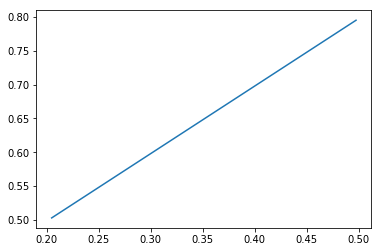

In [59]:
import matplotlib.pyplot as plt
import numpy as np

x =  FPR # false_positive_rate
y =  TPR # true_positive_rate 

# This is the ROC curve
plt.plot(x,y)
plt.show() 

This type of plot can help to quickly identify the most correlated variables

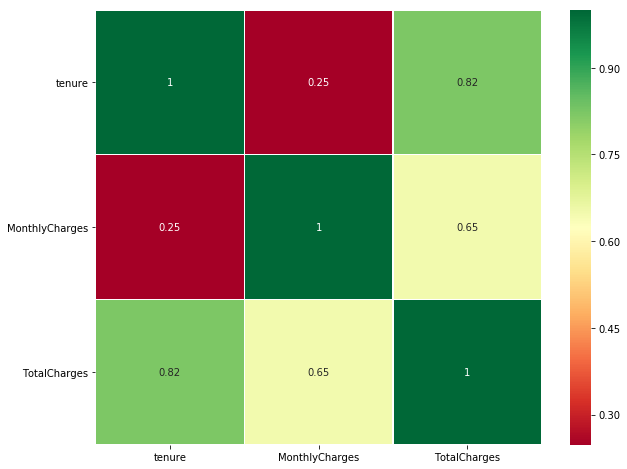

In [60]:
import seaborn as sns
sns.heatmap(data_for_correlation.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [61]:
Interpretation of Heatmap : 

SyntaxError: invalid syntax (<ipython-input-61-7fe5ea18d8dc>, line 1)

In [ ]:
not_senior_citizen_yes_churn = ((data['SeniorCitizen'] == 0)&(data['Churn']=='Yes')).sum()
not_senior_citizen_yes_churn = ((data['SeniorCitizen'] ==0)&(data['Churn']=='No')).sum()

In [ ]:
labels = 'Senior Citizen - Yes','Senior Citizen - No'
sizes = not_senior_citizen_yes_churn , not_senior_citizen_yes_churn
colors = ['lightskyblue','red']
plt.pie(sizes,labels = labels,colors = colors,radius = 1.25,shadow = True, autopct='%1.1f%%')
plt.title('Churn for Non Senior Citizen')
plt.show()

In [ ]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [ ]:
iris.feature_names

In [ ]:
iris

In [ ]:
df.head(3)

In [ ]:
y

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
# Graphviz is open source graph visualization software
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data)